# **QSAR Model Building of Coronavirus Replicase 1ab Inhibitors**

Rajesh Das

# Read in data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Replicase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.408935
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.677781
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.801343
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.474955
163,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.341989
164,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.782516
165,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.424812


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
163,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
165,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0      6.408935
1      6.677781
2      7.096910
3      5.801343
4      7.397940
         ...   
162    5.474955
163    5.341989
164    5.782516
165    5.424812
166    5.954677
Name: pIC50, Length: 167, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,...,PubchemFP735,PubchemFP756,PubchemFP758,PubchemFP761,PubchemFP777,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
163,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
164,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
165,1,0,1,0,1,1,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Decision Tree Regression Model

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X, Y)
r2 = model1.score(X, Y)
r2

0.9631888814586754

## Model Prediction

In [10]:
Y_pred = model1.predict(X)
Y_pred

array([6.40893539, 6.67778071, 7.09691001, 5.80134291, 7.39794001,
       5.49620932, 6.2623097 , 6.69897   , 7.        , 6.79588002,
       5.3439018 , 6.36501016, 6.85387196, 6.65757732, 6.82390874,
       6.85387196, 5.5697711 , 8.        , 6.26760624, 6.40893539,
       7.69897   , 7.30103   , 6.7212464 , 6.79588002, 6.56863624,
       7.69897   , 5.69036983, 5.37468755, 5.91009489, 5.68824614,
       5.49620932, 5.49894074, 5.86327943, 6.82390874, 5.627088  ,
       5.96657624, 5.33913452, 5.4710833 , 5.59006688, 5.79860288,
       6.13076828, 6.01322827, 5.95078198, 6.36501016, 6.85387196,
       5.44977165, 6.1739252 , 5.5697711 , 5.58004425, 5.72815839,
       5.51999306, 6.74472749, 5.52432881, 5.70114692, 5.82681373,
       6.08618615, 5.60906489, 5.46597389, 5.4134127 , 5.87942607,
       6.61978876, 7.30103   , 7.52287875, 6.00877392, 5.43651891,
       5.9788107 , 7.52287875, 6.65757732, 6.61978876, 6.37675071,
       5.3990271 , 5.34294415, 6.02687215, 6.29242982, 6.53760

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.04
Coefficient of determination (R^2): 0.96


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

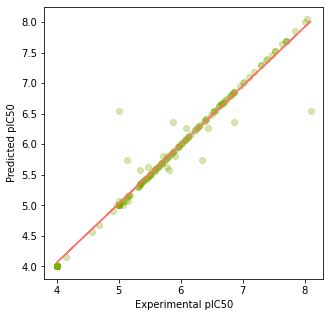

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [16]:
pickle.dump(model1, open('Replicase_DT_model.pkl', 'wb'))